# Transitivity and Triads

## Introduction to Transitivity and Triads

### Overview of Transitivity in Graphs

Transitivity in graphs, often referred to as the clustering coefficient, measures the degree to which nodes in a graph tend to cluster together. A graph is considered transitive if the presence of an edge between nodes \(A\) and \(B\) and between nodes \(B\) and \(C\) implies a direct edge between nodes \(A\) and \(C\).


In [1]:
import math
from itertools import combinations

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from matplotlib_venn import venn2
from tqdm.auto import tqdm

import data_utils
import graph_utils

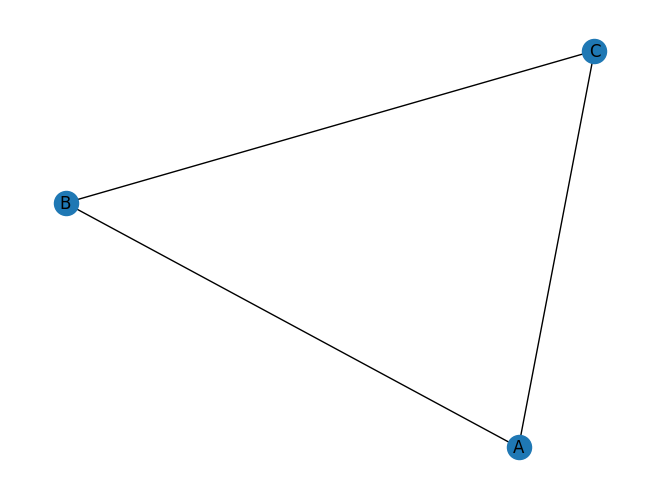

In [2]:
# simplest transitive graph
G = nx.Graph()
edges = [("A", "B"), ("B", "C"), ("A", "C")]
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

Transitivity is a measure of the likelihood that two nodes that are connected to the same node are also connected to each other. In the example above, the transitivity of the graph is 1, as all nodes are connected to each other.

In [3]:
nx.transitivity(G)

1.0

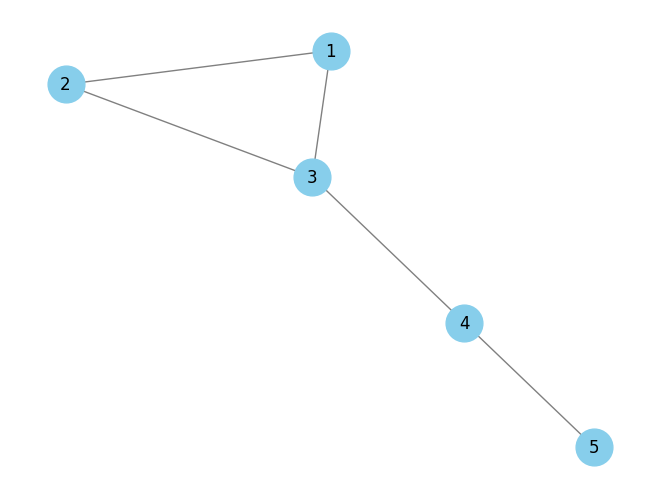

In [4]:
G = nx.Graph()
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_color="skyblue", node_size=700, edge_color="gray")

In [5]:
# Calculating and displaying transitivity
transitivity = nx.transitivity(G)
transitivity

0.5

Graph transitivity 0.5 means that 50% of the possible triangles in the graph are present. In the example above, the transitivity of the graph is 0.5, as 3 out of 6 possible triangles are present.

Transitivity is closely related to graph density, which measures the ratio of the number of edges in a graph to the number of possible edges. The transitivity of a graph can be calculated using the formula:

In [6]:
nx.density(G)

0.5

| **Aspect**       | **Transitivity**                                                                   | **Density**                                                                                           |
|------------------|------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Definition**   | The ratio of closed triads (triangles) to all triads                               | The ratio of the number of edges to the number of possible edges                                      |
| **Formula**      | $ \frac{3 \times \text{Number of triangles}}{\text{Number of connected triples}} $ | $ \frac{2 \times \text{Number of edges}}{\text{Number of nodes} \times (\text{Number of nodes} - 1)} $ |
| **Range**        | 0 to 1                                                                             | 0 to 1                                                                                                |
| **Focus**        | Measures local clustering or cohesiveness                                          | Measures overall connectivity                                                                         |
| **Graph Type**   | Typically used for undirected graphs                                               | Applicable to both directed and undirected graphs                                                     |
| **Interpretation**| High transitivity indicates many closed triads                                     | High density indicates a highly connected graph                                                       |

Note that transitivity is not the same as density. While density measures the proportion of actual edges to possible edges in a graph, transitivity measures the likelihood that two nodes that are connected to the same node are also connected to each other.

0.014925373134328358
0.020202020202020204


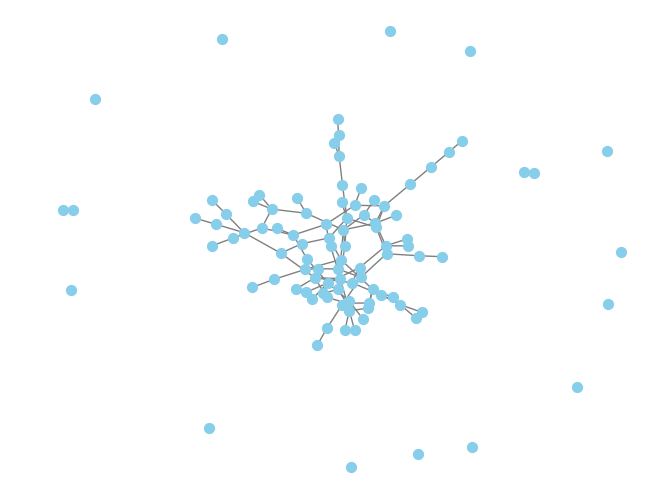

In [7]:
def generate_random_graph(num_nodes, num_edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    while len(G.edges()) < num_edges:
        u = np.random.choice(list(G.nodes()))
        v = np.random.choice(list(G.nodes()))
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
    return G


G = generate_random_graph(100, 100)
nx.draw(G, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")
print(nx.transitivity(G))
print(nx.density(G))

Transitivity: 0.068433, Density: 0.04


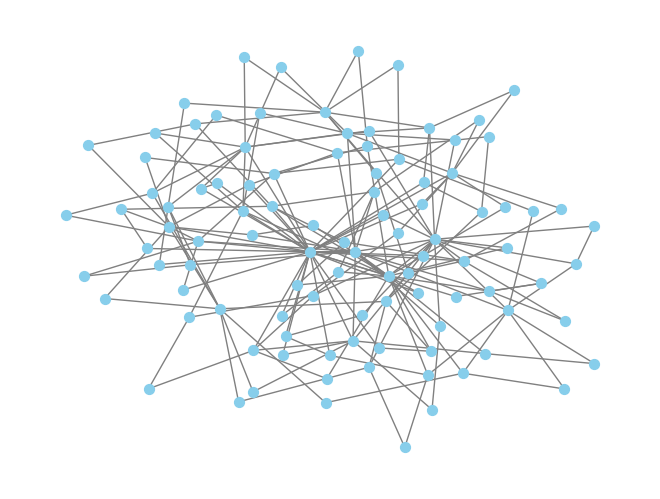

In [8]:
G = nx.barabasi_albert_graph(100, 2)
nx.draw(G, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")
transitivity = nx.transitivity(G)
density = nx.density(G)
print(f"Transitivity: {transitivity:2f}, Density: {density:.2f}")

Text(0.5, 0.98, 'In random graphs, transitivity and density approximately equal')

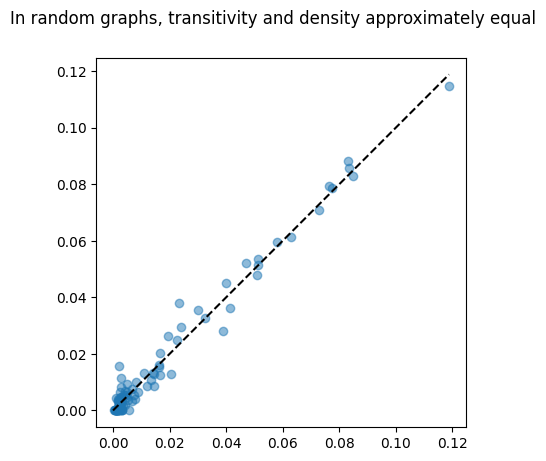

In [9]:
# random graph
transitivity_density = []
for _ in range(100):
    n_nodes = np.random.randint(100, 1000)
    n_edges = np.random.randint(200, 1000)
    G = generate_random_graph(n_nodes, n_edges)
    transitivity = nx.transitivity(G)
    density = nx.density(G)
    transitivity_density.append((transitivity, density))
transitivity_density = np.array(transitivity_density)
fig, ax = plt.subplots()
ax.plot(transitivity_density[:, 1], transitivity_density[:, 0], "o", alpha=0.5)
mx = transitivity_density.max()
mn = transitivity_density.min()
ax.plot([mn, mx], [mn, mx], "k--")
ax.set_aspect(1)
fig.suptitle("In random graphs, transitivity and density approximately equal")

Text(0.5, 0.98, '... but not in scale-free graphs')

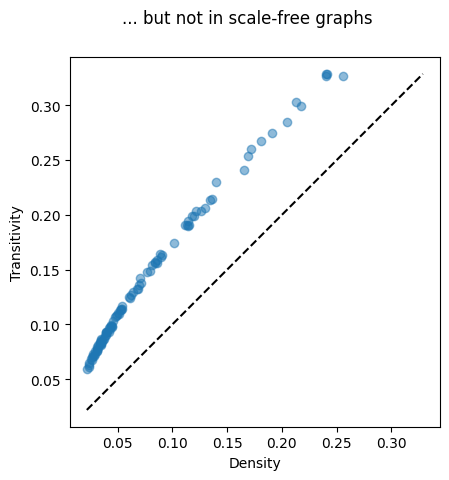

In [10]:
transitivity_density = []
for _ in range(100):
    n_nodes = np.random.randint(100, 1000)
    n_edges_per_node = np.random.randint(10, 20)
    G = nx.barabasi_albert_graph(n_nodes, n_edges_per_node)
    transitivity = nx.transitivity(G)
    density = nx.density(G)
    transitivity_density.append((transitivity, density))
transitivity_density = np.array(transitivity_density)
fig, ax = plt.subplots()
ax.plot(transitivity_density[:, 1], transitivity_density[:, 0], "o", alpha=0.5)
mx = transitivity_density.max()
mn = transitivity_density.min()
ax.plot([mn, mx], [mn, mx], "k--")
ax.set_aspect(1)
ax.set_xlabel("Density")
ax.set_ylabel("Transitivity")
fig.suptitle("... but not in scale-free graphs")

## Local structure of graph
Local structures in a network refer to the arrangement and connections of a node with its immediate neighbors. These structures help in understanding the roles and relationships of nodes within the network.

Text(0.5, 1.0, 'Example Graph for Local Structures')

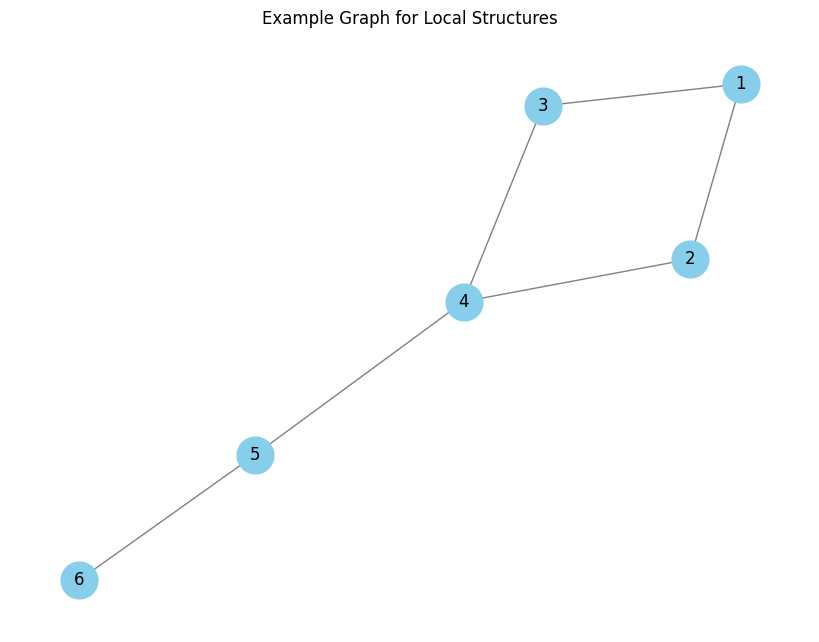

In [11]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6)]
G.add_edges_from(edges)

# Drawing the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title('Example Graph for Local Structures')

### Triads and Triplets: Key Differences

Triads and triplets are both local structures but differ in their completeness. 
* A triad is a set of three nodes where each node is connected to the other two, forming a triangle. 
* A triplet consists of three nodes connected by two edges, forming an open path.

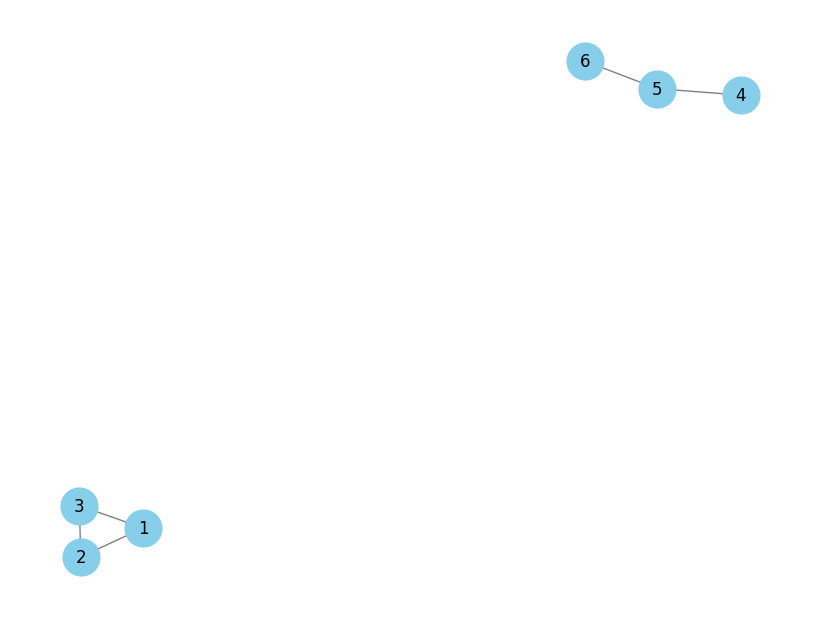

In [12]:
G = nx.Graph()
triad_edges = [(1, 2), (2, 3), (3, 1)]
triplet_edges = [(4, 5), (5, 6)]
G.add_edges_from(triad_edges + triplet_edges)

# Drawing the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')

### Algebraic Properties of Local Structures

The algebraic properties of local structures include metrics like the clustering coefficient and degree centrality. These properties help quantify the connectivity and importance of nodes within their local neighborhood.

We already met many of these metrics in the previous sections. Let's calculate them for the graph above.

Text(0.5, 1.0, 'Graph with a Triad (1, 2, 3) and a Triplet (4, 5, 6)')

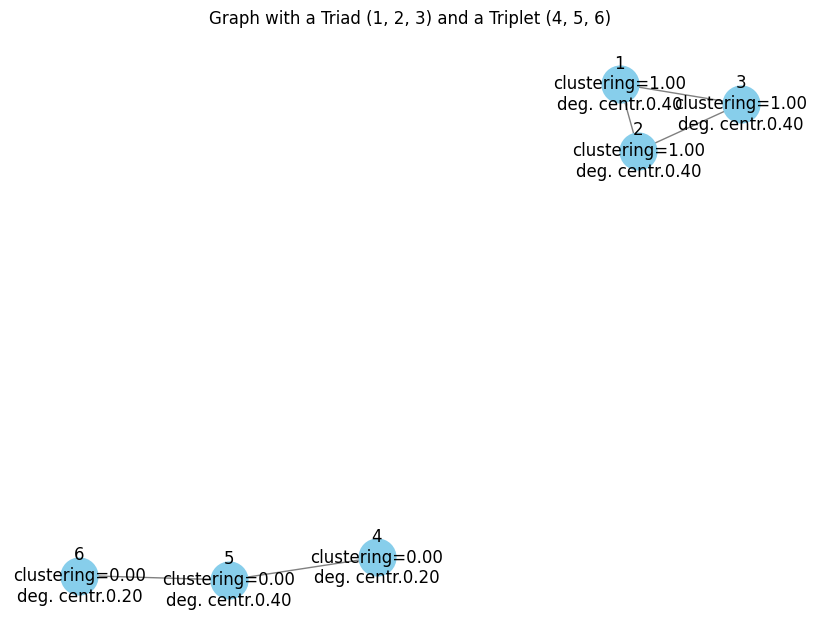

In [13]:
# Calculating clustering coefficients and degree centrality
clustering_coefficients = nx.clustering(G)
degree_centrality = nx.degree_centrality(G)
node_labels = {node: f"{node}\nclustering={cc:.2f}\ndeg. centr.{dc:.2f}" for node, cc, dc in zip(G.nodes(), clustering_coefficients.values(), degree_centrality.values())}
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, labels=node_labels, node_color='skyblue', node_size=700, edge_color='gray')
plt.title('Graph with a Triad (1, 2, 3) and a Triplet (4, 5, 6)')

Note the nodes with clustering coefficient of 0.0. These nodes are not part of any closed triads, meaning they do not form any triangles with their neighbors.

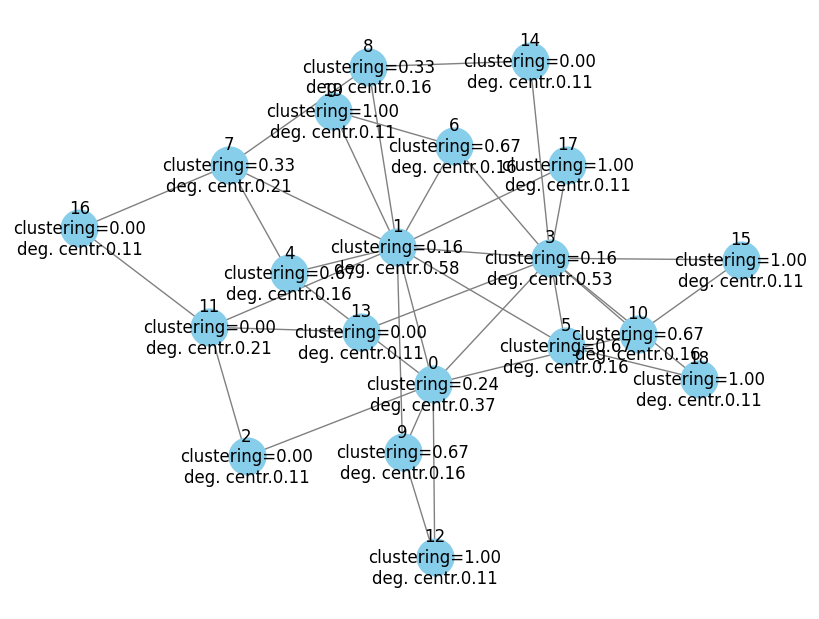

In [14]:
G = nx.barabasi_albert_graph(20, 2)
clustering_coefficients = nx.clustering(G)
degree_centrality = nx.degree_centrality(G)
node_labels = {node: f"{node}\nclustering={cc:.2f}\ndeg. centr.{dc:.2f}" for node, cc, dc in zip(G.nodes(), clustering_coefficients.values(), degree_centrality.values())}
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, labels=node_labels, node_color='skyblue', node_size=700, edge_color='gray')

More info

- For more on local structures, see this 1976 text by Holland and Leinhardt: [Local Structure in Social Networks](https://www.jstor.org/stable/270703)
- For details on clustering coefficients and centrality, see [NetworkX Documentation](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).

## Triads

Triads are subgraphs with three nodes and two edges. There are 16 possible types of triads, each of which can be classified based on the presence or absence of edges between the three nodes. The triad types are numbered from 0 to 16, with each number corresponding to a specific configuration of edges in the triad.

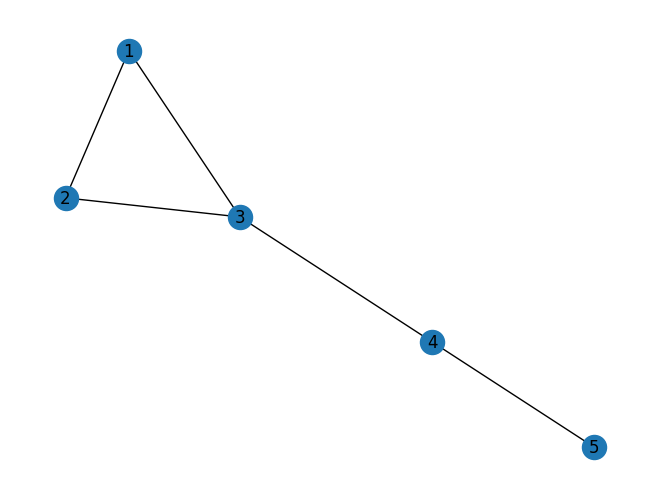

In [15]:
def find_triads(graph):
    triads = [
        graph.subgraph(nodes)
        for nodes in nx.enumerate_all_cliques(graph)
        if len(nodes) == 3
    ]
    return triads


G = nx.Graph()
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

In [16]:
# Displaying all triads in the graph
triads = find_triads(G)
print("Triads in the graph:")
for triad in triads:
    print(list(triad.nodes))

Triads in the graph:
[1, 2, 3]


Number of triads: 182


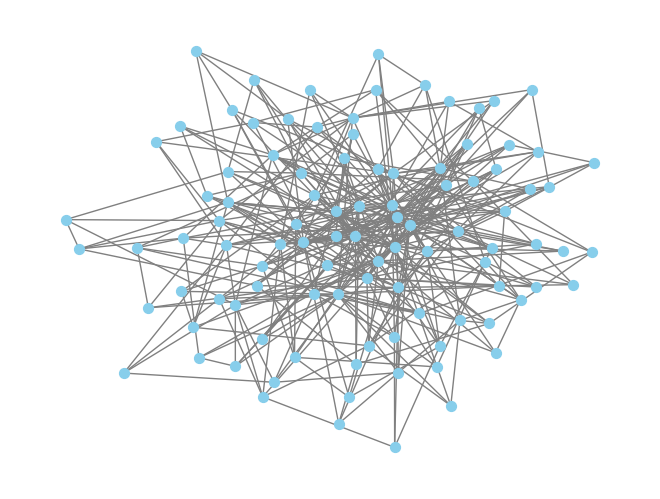

In [17]:
G = nx.barabasi_albert_graph(100, 4)
triads = find_triads(G)
print(f"Number of triads: {len(triads)}")
nx.draw(G, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")

You may read about triads in more detail in the following resources:

1. **"Triads" from *Social Network Analysis* by Stanley Wasserman and Katherine Faust**  
   [Read the chapter on Cambridge University Press](https://doi.org/10.1017/CBO9780511815478.015)

2. **"A puzzle concerning triads in social networks: Graph theory analysis" by David Easley and Jon Kleinberg**  
   [Access the paper on Cornell University Library](https://arxiv.org/abs/0911.4953)

3. **"Triadic Closure Pattern Analysis and Prediction in Social Networks" by Jure Leskovec, et al.**  
   [View the study on Stanford University](https://snap.stanford.edu/class/cs224w-readings/leskovec10graph.pdf)

#### Triads in real-world networks



Let's take a look at the anonymized network that was generated using email data from a large European research institution [[REF](https://snap.stanford.edu/data/email-Eu-core-temporal.html)]. In the original dataset, a directed edge (u, v, t) means that person u sent an email to person v at time t. A separate edge is created for each recipient of the email. We will aggregate the data and convert it into a non-directional graph.

In [18]:
# Load dataset
df_edges_raw = data_utils.load_dataset_from_web(
    "email-Eu-core-temporal.txt.gz", sep=" "
)
df_edges_raw.columns = ["source", "target", "ts_seconds"]
df_edges_raw["ts_days"] = df_edges_raw["ts_seconds"] // (24 * 3600)

# Generate dataframe with weight and first_ts
df_edges = (
    df_edges_raw.groupby(["source", "target"])
    .agg(first_day=("ts_days", "min"), weight=("ts_days", "count"))
    .reset_index()
    .sort_values("first_day")
)

print(
    f"The dataset contains {df_edges.shape[0]:,} directional edges that span {df_edges['first_day'].max()} days."
)
df_edges.head()

The dataset contains 24,929 directional edges that span 802 days.


,source,target,first_day,weight
14253,569,295,0,69
9513,360,561,0,2
18109,724,246,0,106
14201,568,379,0,107
24468,987,641,0,313


In [19]:
# Convert to non-directional edges
df_non_directed_edges = df_edges.copy()
df_non_directed_edges["source"], df_non_directed_edges["target"] = np.minimum(
    df_edges["source"], df_edges["target"]
), np.maximum(df_edges["source"], df_edges["target"])

df_non_directed_edges = (
    df_non_directed_edges.groupby(["source", "target"])
    .agg(weight=("weight", "sum"), first_day=("first_day", "min"))
    .reset_index()
    .sort_values("first_day")
)

print(
    f'The dataset contains {df_non_directed_edges.shape[0]:,} non-directional edges that span {df_non_directed_edges["first_day"].max()} days.'
)
df_non_directed_edges

The dataset contains 16,064 non-directional edges that span 802 days.


,source,target,weight,first_day
13081,568,947,97,0
9425,335,980,78,0
9426,335,985,26,0
5385,168,260,816,0
9427,335,1004,39,0
...,...,...,...,...
3530,112,425,1,802
5852,185,416,1,802
13959,633,873,1,802
5718,179,789,1,802


In [20]:
# Create social graph before cutoff day
day_cutoff = 365
df_non_directed_edges_before = df_non_directed_edges[
    df_non_directed_edges["first_day"] < day_cutoff
]
social_graph = nx.from_pandas_edgelist(df_non_directed_edges_before, edge_attr=True)

perc_before_cutoff = (
    df_non_directed_edges_before.shape[0] / df_non_directed_edges.shape[0] * 100
)
print(
    f"The social graph contains {social_graph.number_of_nodes():,} nodes and {social_graph.number_of_edges():,} edges. {perc_before_cutoff:.2f}% of the edges are before the cutoff day {day_cutoff}."
)

The social graph contains 891 nodes and 12,457 edges. 77.55% of the edges are before the cutoff day 365.


In [21]:
nodes_in_social_graph = set(social_graph.nodes)

# Filter newly added edges
newly_added_edges = df_non_directed_edges[
    df_non_directed_edges["first_day"] >= day_cutoff
]
sel = newly_added_edges["source"].isin(nodes_in_social_graph) & newly_added_edges[
    "target"
].isin(nodes_in_social_graph)
print(
    f"Out of {newly_added_edges.shape[0]:,} newly added edges, {sel.sum():,} are between nodes in the social graph."
)
newly_added_edges = newly_added_edges[sel]


# Function to count the number of new triads closed by adding an edge
def count_new_triads(graph, u, v):
    neighbors_u = set(graph.neighbors(u))
    neighbors_v = set(graph.neighbors(v))
    common_neighbors = neighbors_u & neighbors_v
    return len(common_neighbors)


# Count new triads closed by each newly added edge
new_triads_counts = [
    (
        row["source"],
        row["target"],
        count_new_triads(social_graph, row["source"], row["target"]),
    )
    for _, row in newly_added_edges.iterrows()
]

Out of 3,607 newly added edges, 2,755 are between nodes in the social graph.


In [22]:
new_triads_counts = pd.DataFrame(
    new_triads_counts, columns=["source", "target", "new_triads"]
).sort_values("new_triads", ascending=False)

perc_created_triads = (new_triads_counts["new_triads"] > 0).mean() * 100
print(
    f"Of the {new_triads_counts.shape[0]:,} newly added edges, {perc_created_triads:.2f}% create at least one new triad."
)

Of the 2,755 newly added edges, 95.57% create at least one new triad.


As we can see the vast majority of newly created edges in a real-life social network close at least one new triad. This can be due to two reasons:
1. The connection has already been established in the past, but the data was not available. We can test this hypothesis by inspecting the percentage of new triages as a functio of the cutoff day.
2. The connection is a result of the network's natural evolution, and the triad closure principle is at play.


In [23]:
def percentage_of_new_triades(df_non_directed_edges, cutoff) -> pd.DataFrame:
    df_non_directed_edges_before = df_non_directed_edges[
        df_non_directed_edges["first_day"] < cutoff
    ]
    social_graph = nx.from_pandas_edgelist(df_non_directed_edges_before, edge_attr=True)
    nodes_in_social_graph = set(social_graph.nodes)

    # Filter newly added edges
    newly_added_edges = df_non_directed_edges[
        df_non_directed_edges["first_day"] >= cutoff
    ]
    sel = newly_added_edges["source"].isin(nodes_in_social_graph) & newly_added_edges[
        "target"
    ].isin(nodes_in_social_graph)
    newly_added_edges = newly_added_edges[sel]

    # Count new triads closed by each newly added edge
    new_triads_counts = [
        (
            row["source"],
            row["target"],
            count_new_triads(social_graph, row["source"], row["target"]),
        )
        for _, row in newly_added_edges.iterrows()
    ]
    new_triads_counts = pd.DataFrame(
        new_triads_counts, columns=["source", "target", "new_triads"]
    ).sort_values("new_triads", ascending=False)

    perc_created_triads = (new_triads_counts["new_triads"] > 0).mean() * 100
    return perc_created_triads

In [24]:
cutoff_days = np.arange(10, 800, 5)
perc_created_triads = [
    (cutoff, percentage_of_new_triades(df_non_directed_edges, cutoff))
    for cutoff in tqdm(cutoff_days)
]
perc_created_triads = pd.DataFrame(
    perc_created_triads, columns=["cutoff", "perc_created_triads"]
)

  0%|          | 0/158 [00:00<?, ?it/s]

Text(0, 0.5, 'Percentage of new triads created')

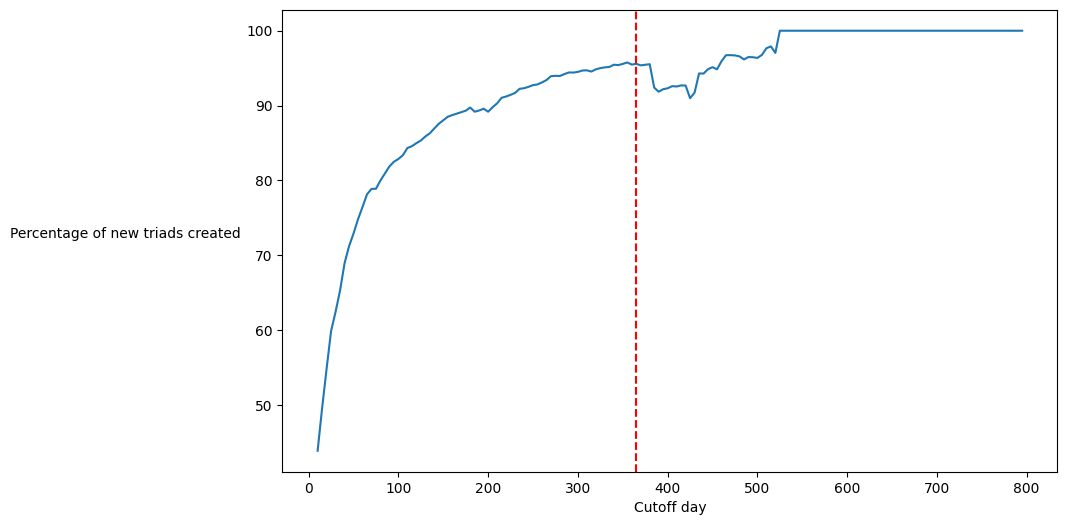

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(perc_created_triads["cutoff"], perc_created_triads["perc_created_triads"], "-")
ax.axvline(365, color='red', linestyle='--', label='Cutoff day')
ax.set_xlabel("Cutoff day")
ax.set_ylabel("Percentage of new triads created", rotation=0, ha="right")

#### Types of Triads

Not all triads are similar. In fact, in a directed graph, there are 16 possible types of triads, each of which can be classified based on the presence or absence of edges between the three nodes. The triad types are numbered from 0 to 16, with each number corresponding to a specific configuration of edges in the triad. 

or more information, refer to the work by Holland and Leinhardt on triad census:
Holland, P. W., & Leinhardt, S. (1970). A Method for Detecting Structure in Sociometric Data. American Journal of Sociology, 70(5), 492-513.  

More realistically, you can refer to the Wikipedia page on [Triad (social science)](https://en.wikipedia.org/wiki/Triad_(social_science)).

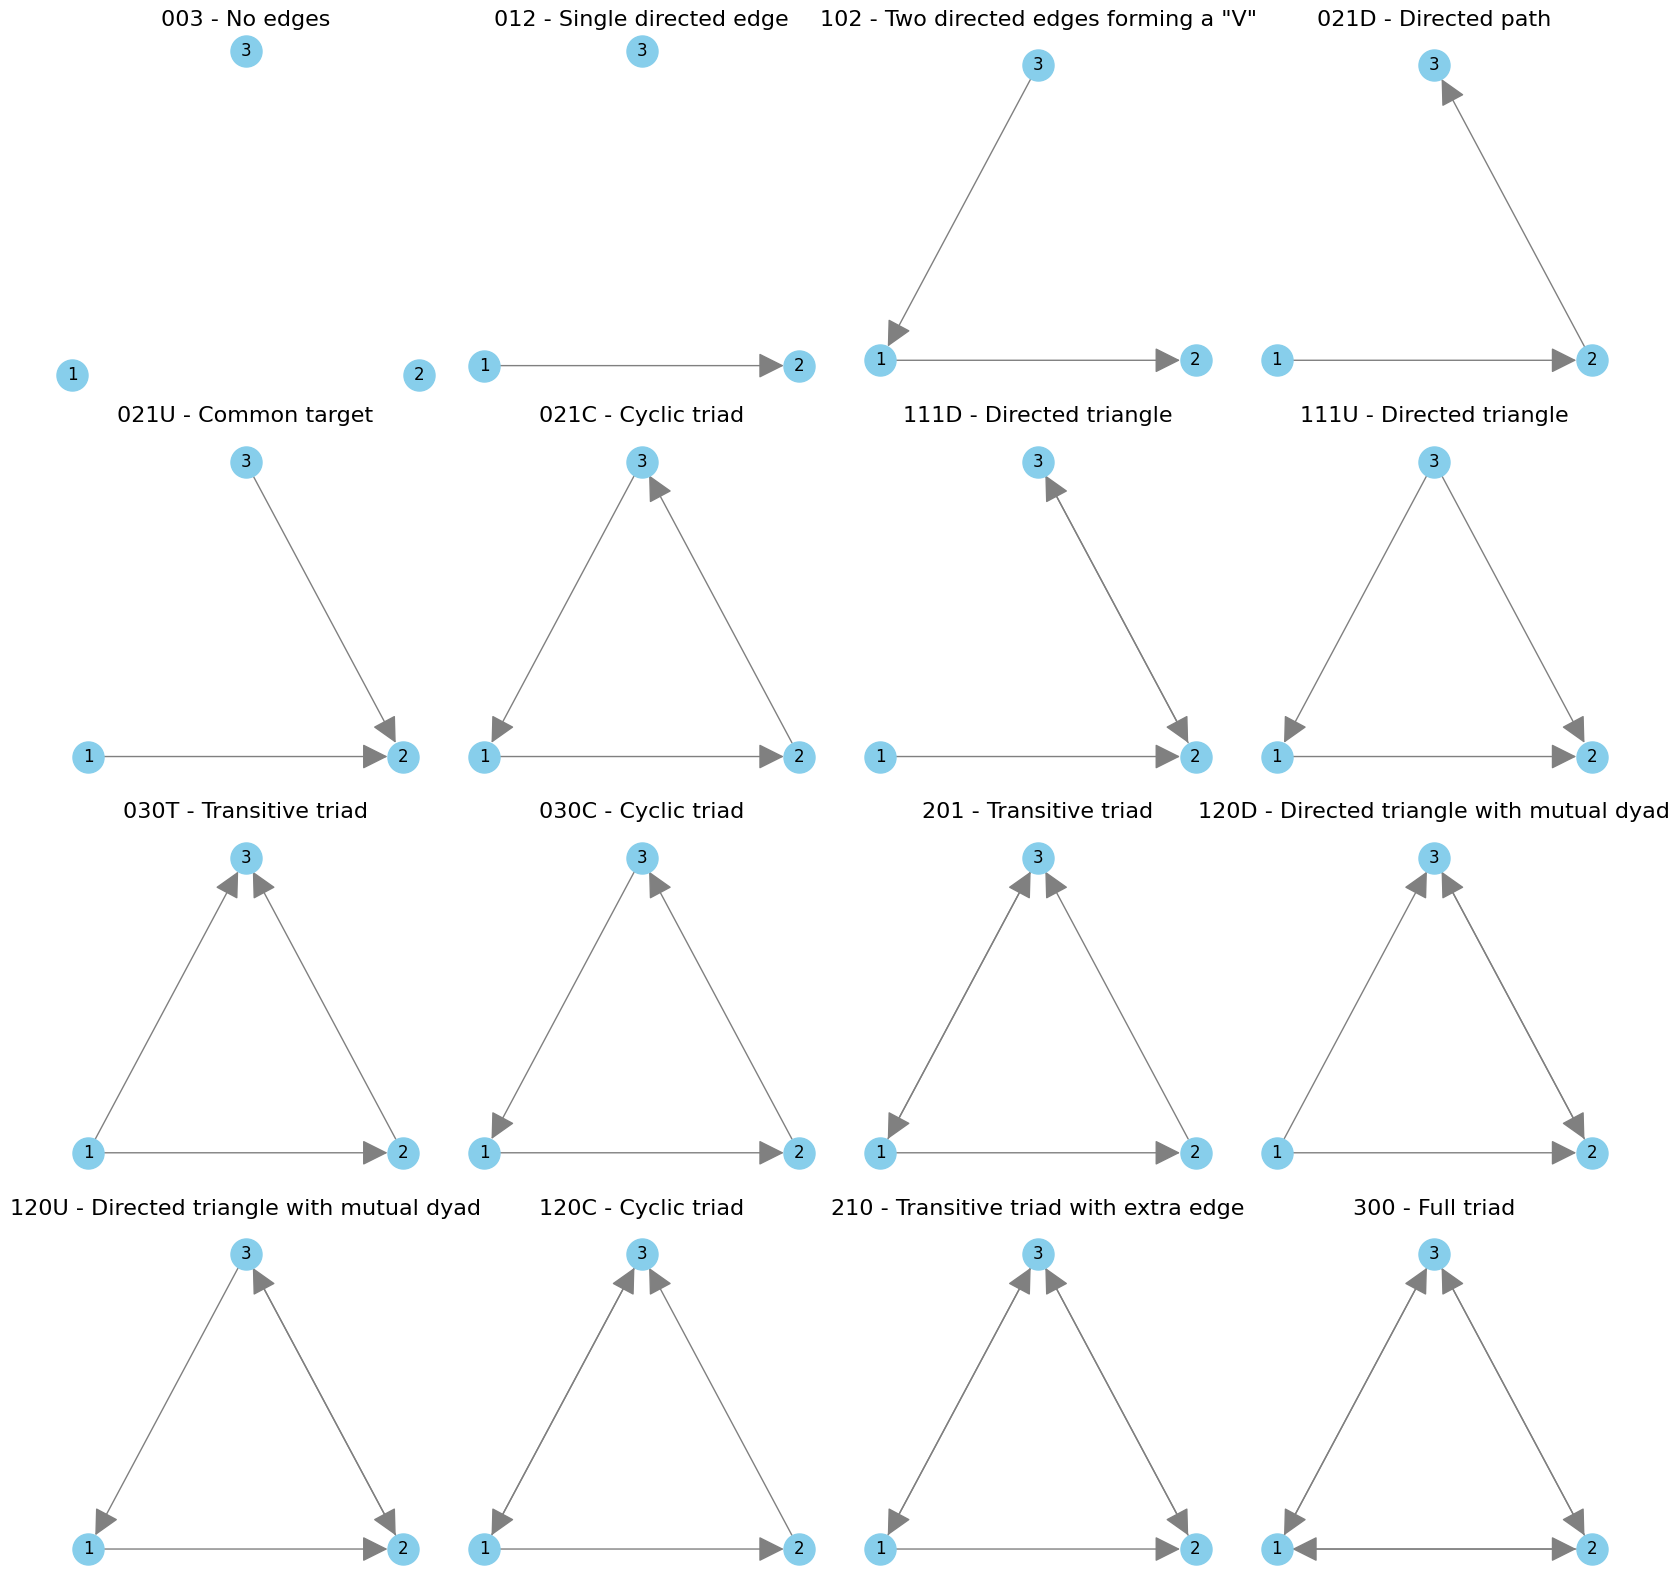

In [26]:
# List of triad types for directed graphs with descriptions
triad_types = [
    ("003 - No edges", []),
    ("012 - Single directed edge", [(1, 2)]),
    ('102 - Two directed edges forming a "V"', [(1, 2), (3, 1)]),
    ("021D - Directed path", [(1, 2), (2, 3)]),
    ("021U - Common target", [(1, 2), (3, 2)]),
    ("021C - Cyclic triad", [(1, 2), (2, 3), (3, 1)]),
    ("111D - Directed triangle", [(1, 2), (2, 3), (3, 2)]),
    ("111U - Directed triangle", [(1, 2), (3, 2), (3, 1)]),
    ("030T - Transitive triad", [(1, 2), (1, 3), (2, 3)]),
    ("030C - Cyclic triad", [(1, 2), (2, 3), (3, 1)]),
    ("201 - Transitive triad", [(1, 2), (2, 3), (3, 1), (1, 3)]),
    ("120D - Directed triangle with mutual dyad", [(1, 2), (2, 3), (3, 2), (1, 3)]),
    ("120U - Directed triangle with mutual dyad", [(1, 2), (2, 3), (3, 1), (3, 2)]),
    ("120C - Cyclic triad", [(1, 2), (2, 3), (3, 1), (1, 3)]),
    (
        "210 - Transitive triad with extra edge",
        [(1, 2), (2, 3), (3, 1), (1, 3), (3, 2)],
    ),
    ("300 - Full triad", [(1, 2), (2, 3), (3, 1), (1, 3), (3, 2), (2, 1)]),
]

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()
layout = {1: (0, 0), 2: (1, 0), 3: (0.5, 1)}
# Create and draw each triad
for i, (name, edges) in enumerate(triad_types):
    G = nx.DiGraph()
    # add nodes 1, 2, 3
    G.add_nodes_from([1, 2, 3])
    G.add_edges_from(edges)
    nx.draw(
        G,
        ax=axes[i],
        with_labels=True,
        node_color="skyblue",
        node_size=500,
        edge_color="gray",
        arrows=True,
        arrowsize=40,
        pos=layout,
    )
    axes[i].set_title(name, fontsize=16)
    axes[i].set_axis_off()

fig.tight_layout()

DiGraph with 108 nodes and 87 edges


{'003': 195681,
 '012': 7746,
 '102': 513,
 '021D': 189,
 '021U': 3,
 '021C': 7,
 '111D': 2,
 '111U': 13,
 '030T': 1,
 '030C': 0,
 '201': 1,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

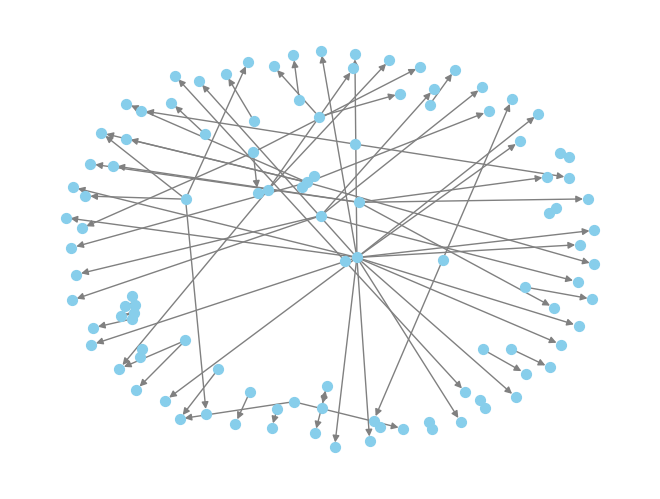

In [27]:
df_edges_directed = (
    df_edges_raw.head(100)
    .groupby(["source", "target"])
    .agg(first_day=("ts_days", "min"), weight=("ts_days", "count"))
    .reset_index()
    .sort_values("first_day")
)
graph_directed = nx.from_pandas_edgelist(
    df_edges_directed, edge_attr=True, create_using=nx.DiGraph
)
nx.draw(graph_directed, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")
print(graph_directed)
census = nx.triadic_census(graph_directed)
census

<Axes: xlabel='Count'>

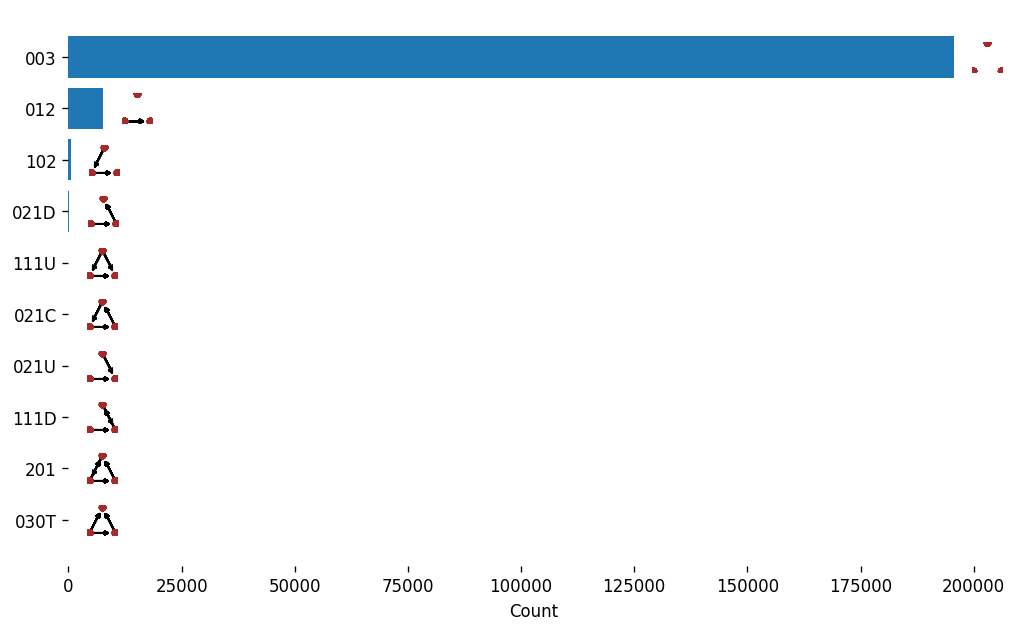

In [28]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
graph_utils.plot_triad_census(graph_directed, ax=ax, top_n=10, ignore_no_edges=False)

<Axes: xlabel='Count'>

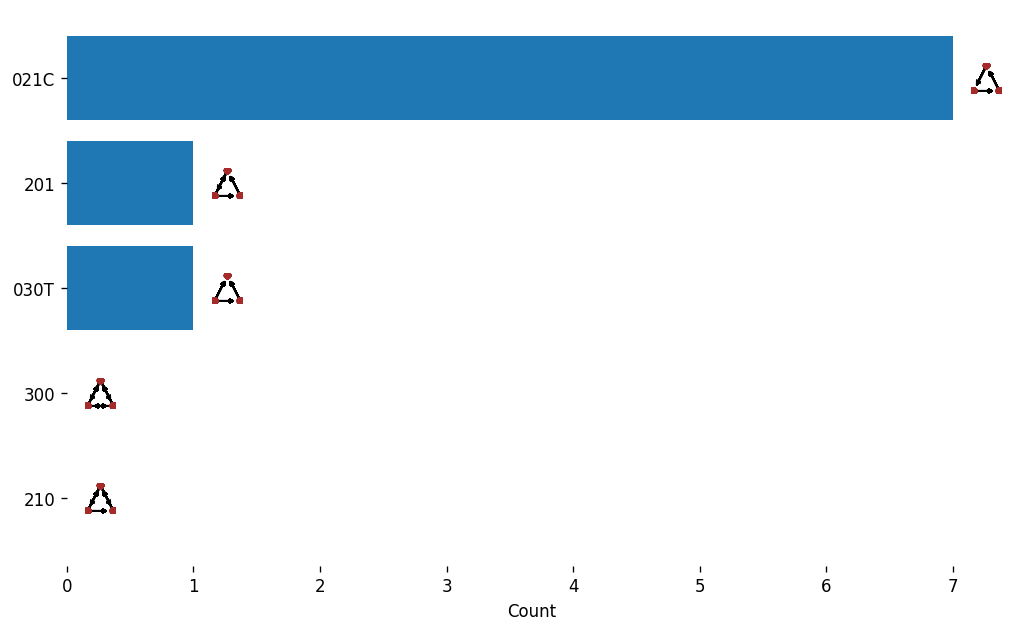

In [29]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
graph_utils.plot_triad_census(graph_directed, ax=ax, top_n=5, ignore_non_triads=True)

### Connecting Transitivity and Triads to Machine Learning

In machine learning, features derived from graph properties, such as transitivity and the presence of triads, can be used to enhance predictive models. These features can help in tasks like node classification and link prediction.

In [30]:
def get_triad_type(triad):
    """
    Determine the type of triad based on the number of edges in an undirected graph.

    Parameters:
    triad (networkx.Graph): The triad subgraph.

    Returns:
    str: The triad type.
    """
    edges = triad.number_of_edges()
    if edges == 0:
        return "003"
    elif edges == 1:
        return "012"
    elif edges == 2:
        return "102"
    elif edges == 3:
        return "300"
    return "Unknown"


def triadic_metrics_undirected(G):
    """
    Calculate triadic closure metrics and triad types for each node in an undirected graph.

    Parameters:
    G (networkx.Graph): The input graph.

    Returns:
    pd.DataFrame: A dataframe with the node id as an index and the following columns:
        - clustering_coefficient: The clustering coefficient of the node.
        - closed_triads: The number of closed triads (triangles) the node participates in.
        - open_triads: The number of open triads (two-edge paths) the node is part of.
        - triad_<type>: The count of each triad type the node is part of.
    """
    triad_labels = {
        "003": "No edges",
        "012": "Single edge",
        "102": 'Two edges forming a "V"',
        "300": "Full triad",
    }

    data = {
        "clustering_coefficient": [],
        "closed_triads": [],
        "open_triads": [],
        **{f"triad_{label}": [] for label in triad_labels.values()},
    }

    node_triads = {
        node: {label: 0 for label in triad_labels.values()} for node in G.nodes()
    }

    total_combinations = math.comb(G.number_of_nodes(), 3)

    for nodes in tqdm(
        combinations(G.nodes(), 3),
        total=total_combinations,
        desc="Calculating triads",
        leave=False,
    ):
        subgraph = G.subgraph(nodes)
        triad_type = get_triad_type(subgraph)
        if triad_type in triad_labels:
            label = triad_labels[triad_type]
            for node in nodes:
                node_triads[node][label] += 1

    for n in tqdm(
        G.nodes(),
        total=G.number_of_nodes(),
        desc="Calculating metrics",
        leave=False,
    ):
        clustering_coefficient = nx.clustering(G, n)
        closed_triads = 0
        open_triads = 0
        for neighbor in G.neighbors(n):
            for second_neighbor in G.neighbors(neighbor):
                if second_neighbor != n:
                    if G.has_edge(n, second_neighbor):
                        closed_triads += 1
                    else:
                        open_triads += 1

        data["clustering_coefficient"].append(clustering_coefficient)
        data["closed_triads"].append(closed_triads // 2)
        data["open_triads"].append(open_triads)
        for label in triad_labels.values():
            data[f"triad_{label}"].append(node_triads[n][label])

    df = pd.DataFrame(data, index=G.nodes())
    return df


# Example usage:
G = nx.erdos_renyi_graph(10, 0.5)
triad_metrics = triadic_metrics_undirected(G)
triad_metrics

Calculating triads:   0%|          | 0/120 [00:00<?, ?it/s]

Calculating metrics:   0%|          | 0/10 [00:00<?, ?it/s]

,clustering_coefficient,closed_triads,open_triads,triad_No edges,triad_Single edge,"triad_Two edges forming a ""V""",triad_Full triad
0,0.400000,4,7,3,16,13,4
1,0.500000,3,8,6,16,11,3
2,0.666667,2,7,8,18,8,2
3,0.000000,0,8,7,18,11,0
4,0.400000,4,7,3,16,13,4
5,0.166667,1,8,4,18,13,1
6,0.333333,1,7,7,19,9,1
7,0.333333,1,6,6,21,8,1
8,0.000000,0,8,7,18,11,0
9,0.500000,5,6,3,17,11,5


In [31]:

def get_triad_type_directed(G, nodes):
    """
    Determine the type of triad in a directed graph based on the number and direction of edges.

    Parameters:
    G (networkx.DiGraph): The triad subgraph.
    nodes (tuple): The three nodes forming a triad.

    Returns:
    str: The triad type.
    """
    subgraph = G.subgraph(nodes)
    triad_census = nx.triadic_census(subgraph)
    for key, value in triad_census.items():
        if value == 1:
            return key
    return "Unknown"


def triadic_metrics_directed(G):
    """
    Calculate triadic closure metrics and triad types for each node in a directed graph.

    Parameters:
    G (networkx.DiGraph): The input graph.

    Returns:
    pd.DataFrame: A dataframe with the node id as an index and the following columns:
        - clustering_coefficient: The clustering coefficient of the node.
        - closed_triads: The number of closed triads (triangles) the node participates in.
        - open_triads: The number of open triads (two-edge paths) the node is part of.
        - triad_<type>: The count of each triad type the node is part of.
    """
    triad_labels = [
        "003",
        "012",
        "102",
        "021D",
        "021U",
        "021C",
        "111D",
        "111U",
        "030T",
        "030C",
        "201",
        "120D",
        "120U",
        "120C",
        "210",
        "300",
    ]

    data = {
        "clustering_coefficient": [],
        "closed_triads": [],
        "open_triads": [],
        **{f"triad_{label}": [] for label in triad_labels},
    }

    node_triads = {node: {label: 0 for label in triad_labels} for node in G.nodes()}

    for nodes in tqdm(
        combinations(G.nodes(), 3), total=math.comb(G.number_of_nodes(), 3),
        desc="Calculating triads", leave=False,
    ):
        triad_type = get_triad_type_directed(G, nodes)
        if triad_type in triad_labels:
            for node in nodes:
                node_triads[node][triad_type] += 1

    for n in tqdm(G.nodes(), total=G.number_of_nodes(), desc="Calculating metrics", leave=False,):
        clustering_coefficient = nx.clustering(G.to_undirected(), n)
        closed_triads = 0
        open_triads = 0
        for neighbor in G.successors(n):
            for second_neighbor in G.successors(neighbor):
                if second_neighbor != n:
                    if G.has_edge(n, second_neighbor):
                        closed_triads += 1
                    else:
                        open_triads += 1

        data["clustering_coefficient"].append(clustering_coefficient)
        data["closed_triads"].append(closed_triads // 2)
        data["open_triads"].append(open_triads)
        for label in triad_labels:
            data[f"triad_{label}"].append(node_triads[n][label])

    df = pd.DataFrame(data, index=G.nodes())
    return df


# Example usage:
G = nx.erdos_renyi_graph(10, 0.5, directed=True)
triad_metrics = triadic_metrics_directed(G)
triad_metrics

Calculating triads:   0%|          | 0/120 [00:00<?, ?it/s]

Calculating metrics:   0%|          | 0/10 [00:00<?, ?it/s]

,clustering_coefficient,closed_triads,open_triads,triad_003,triad_012,triad_102,triad_021D,triad_021U,triad_021C,triad_111D,triad_111U,triad_030T,triad_030C,triad_201,triad_120D,triad_120U,triad_120C,triad_210,triad_300
0,1.000000,2,8,3,6,6,0,0,2,5,5,0,0,3,0,0,2,3,1
1,0.866667,9,9,2,6,1,1,1,3,5,2,2,0,2,3,2,3,3,0
2,0.638889,3,10,0,0,0,0,2,2,4,3,3,0,2,4,1,6,9,0
3,0.800000,0,6,1,6,5,2,1,4,3,4,1,0,2,3,1,0,3,0
4,0.666667,7,8,0,2,3,2,2,4,6,2,3,1,1,2,2,3,3,0
5,0.700000,3,11,2,6,2,2,5,5,5,2,2,2,0,2,0,1,0,0
6,0.714286,6,6,0,5,1,3,2,3,4,2,3,1,1,3,1,1,6,0
7,0.800000,3,10,1,4,4,2,2,4,4,1,2,0,2,2,1,4,3,0
8,0.678571,7,4,0,1,2,0,2,3,3,3,1,0,3,5,3,3,6,1
9,0.714286,2,10,0,3,3,3,1,3,3,3,1,2,2,3,1,1,6,1


Let’s look at the corporate network dataset, which contains information about which employee reported collaboration with another employee. This is a directed graph, as it is possible for one employee to report collaboration with another without the reverse being true.

In [32]:
g_corporate = data_utils.get_graph("corporate_directional")
layout = nx.spring_layout(g_corporate)

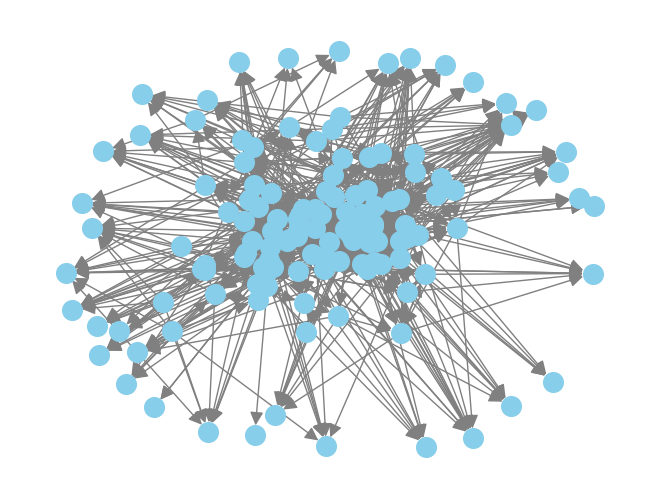

In [33]:
nx.draw(
    g_corporate,
    layout,
    node_size=200,
    node_color="skyblue",
    edge_color="gray",
    arrows=True,
    arrowsize=20,
)

Now, we will remove several edges and try to predict them using a simple model based on triadic closure metrics.

Removing 86 edges from the graph


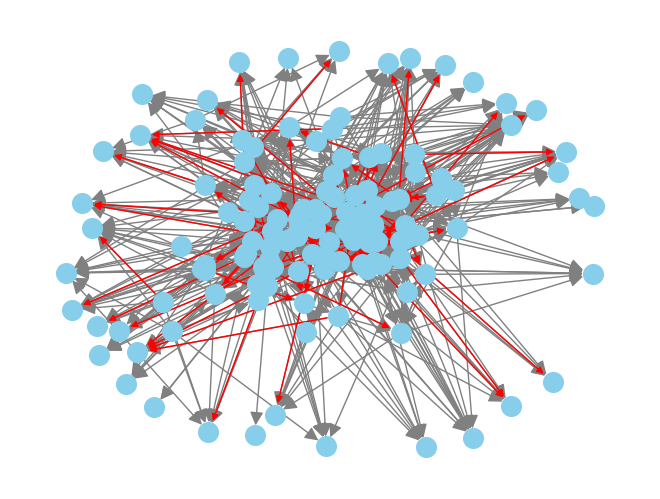

In [34]:
n_to_remove = g_corporate.number_of_edges() // 10
print(f"Removing {n_to_remove} edges from the graph")
edges = list(g_corporate.edges())
edges_to_remove = [
    edges[i] for i in np.random.choice(len(edges), n_to_remove, replace=False)
]
# draw the graph with removed edges marked in red
nx.draw(
    g_corporate,
    layout,
    node_size=200,
    node_color="skyblue",
    edge_color="gray",
    arrows=True,
    arrowsize=20,
)
nx.draw_networkx_edges(g_corporate, layout, edgelist=edges_to_remove, edge_color="red");

In [35]:
g_corporate_removed = g_corporate.copy()
g_corporate_removed.remove_edges_from(edges_to_remove)
metrics = triadic_metrics_directed(g_corporate_removed)

Calculating triads:   0%|          | 0/383306 [00:00<?, ?it/s]

Calculating metrics:   0%|          | 0/133 [00:00<?, ?it/s]

In [36]:
metrics

,clustering_coefficient,closed_triads,open_triads,triad_003,triad_012,triad_102,triad_021D,triad_021U,triad_021C,triad_111D,triad_111U,triad_030T,triad_030C,triad_201,triad_120D,triad_120U,triad_120C,triad_210,triad_300
Alexander Miller,0.176471,7,37,5927,1840,626,40,41,39,37,52,11,0,17,3,9,0,3,1
Seth Daniel,0.238095,0,0,7186,1246,110,69,16,5,0,9,4,0,0,0,1,0,0,0
Kimberly Skinner,0.290909,3,55,6742,1217,518,29,19,11,19,59,7,0,16,0,6,1,1,1
Kim Lee,0.388889,0,0,6977,1426,97,82,22,10,0,18,9,0,0,0,5,0,0,0
Rachael Abbott,0.329670,4,53,6420,1491,512,57,16,36,24,44,9,0,16,5,6,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Michael Thompson,0.523810,7,44,7182,1272,98,10,29,26,18,0,7,0,0,4,0,0,0,0
William Webb,0.277778,6,48,6942,1487,102,26,31,32,16,0,8,0,0,2,0,0,0,0
Alison Dixon,0.164835,8,31,6369,1989,101,76,65,14,17,0,13,0,0,2,0,0,0,0
Timothy Brennan,0.163636,5,36,6709,1694,100,46,52,17,19,0,8,0,0,1,0,0,0,0


In [37]:
def predict_edges(G, triad_metrics, cutoff=0.5, neg_weight=0.1):
    """
    Predict edges in a directed graph based on triadic closure metrics using CatBoost.
    
    Theoretically, we can't be 100% confident in the absence of an edge. 
    However, it is reasonable to assume that a reported edge is a true edge while treating 
    the absence of an edge as a negative sample. 
    This is why we assign a lower weight to negative samples.
    
    Parameters:
    G (networkx.DiGraph): The input graph.
    triad_metrics (pd.DataFrame): DataFrame with triadic closure metrics.
    cutoff (float): The probability threshold for predicting edges.
    neg_weight (float): The weight assigned to negative samples.

    Returns:
    list: A list of predicted edges.
    """
    # Generate training data
    positive_samples = [(u, v) for u, v in G.edges()]
    negative_samples = [
        (u, v) for u in G.nodes() for v in G.nodes() if u != v and not G.has_edge(u, v)
    ]

    positive_labels = [1] * len(positive_samples)
    negative_labels = [0] * len(negative_samples)

    samples = positive_samples + negative_samples
    labels = positive_labels + negative_labels

    # Create feature matrix
    def create_feature_matrix(samples, metrics):
        features = []
        for u, v in samples:
            features.append(
                [
                    metrics.loc[u]["clustering_coefficient"],
                    metrics.loc[u]["closed_triads"],
                    metrics.loc[u]["open_triads"],
                    metrics.loc[v]["clustering_coefficient"],
                    metrics.loc[v]["closed_triads"],
                    metrics.loc[v]["open_triads"],
                ]
            )
        return np.array(features)

    X = create_feature_matrix(samples, triad_metrics)
    y = np.array(labels)

    # Assign weights to samples
    sample_weights = np.array(
        [1] * len(positive_samples) + [neg_weight] * len(negative_samples)
    )

    # Train CatBoost model
    model = CatBoostClassifier(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        loss_function="Logloss",
        verbose=False,
    )
    model.fit(X, y, sample_weight=sample_weights)

    # Predict edges
    potential_edges = [
        (u, v) for u in G.nodes() for v in G.nodes() if u != v and not G.has_edge(u, v)
    ]
    X_potential = create_feature_matrix(potential_edges, triad_metrics)
    prediction_proba = model.predict_proba(X_potential)[:, 1]

    predicted_edges = [
        edge for edge, proba in zip(potential_edges, prediction_proba) if proba > cutoff
    ]

    return predicted_edges

Text(0.5, 0.98, 'Tanimoto score: 0.03')

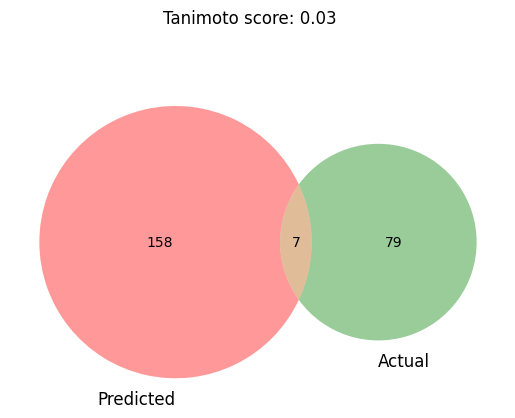

In [38]:
predicted_edges = predict_edges(
    g_corporate_removed, metrics, cutoff=0.7, neg_weight=0.1
)
actual_edges = edges_to_remove
venn2([set(predicted_edges), set(actual_edges)], set_labels=("Predicted", "Actual"))
tanimoto_score = len(set(predicted_edges).intersection(set(actual_edges))) / len(
    set(predicted_edges).union(set(actual_edges))
)
fig = plt.gcf()
fig.suptitle(f"Tanimoto score: {tanimoto_score:.2f}")

Note how the simplistic model based on triadic closure metrics can predict some of the removed edges. Keep in mind that, due to the nature of this particular dataset, neither the existence of an edge nor the absence of an edge is 100% certain.

Text(0.5, 0.98, 'Tanimoto score: 0.00')

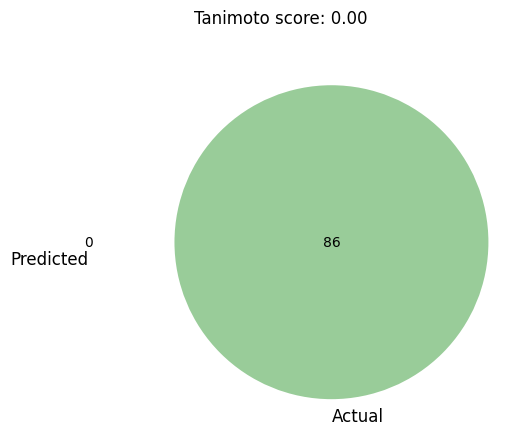

In [39]:
# compare to a random case

shuffled_data = metrics.sample(frac=1).values
shuffled_data = pd.DataFrame(shuffled_data, index=metrics.index, columns=metrics.columns)

predicted_edges = predict_edges(
    g_corporate_removed, 
    shuffled_data, cutoff=0.7, neg_weight=0.1
)
actual_edges = edges_to_remove
venn2([set(predicted_edges), set(actual_edges)], set_labels=("Predicted", "Actual"))
tanimoto_score = len(set(predicted_edges).intersection(set(actual_edges))) / len(
    set(predicted_edges).union(set(actual_edges))
)
fig = plt.gcf()
fig.suptitle(f"Tanimoto score: {tanimoto_score:.2f}")